In [1]:
import sys
sys.path.append('../Modules')

import numpy as np
import matplotlib.pyplot as plt

from DesignMat import Polynomial
from Regressor import LeastSquares

np.random.seed(1234)

def sinusoidal(x):
    return np.sin(2 * np.pi * x)

def create_data(func, sample_size, std, domain=[0, 1]):
    x = np.linspace(*domain, sample_size)
    np.random.shuffle(x)
    t = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, t

**Revisit polynomial curve fitting problem**

We use quadratic regularizer with three different values

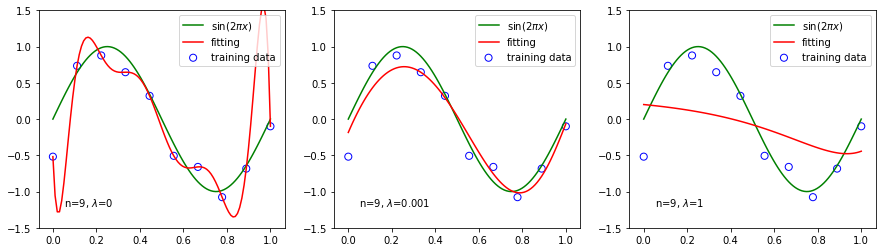

In [2]:
x_train, t_train = create_data(sinusoidal, 10, 0.25)

x_test = np.linspace(0, 1, 100)
t_test = sinusoidal(x_test)

# set degree = 9 because it's the most complicated polynomial model for 10 data points
phi_train = Polynomial(9).dm(x_train)
phi_test  = Polynomial(9).dm(x_test)

fig = plt.figure(figsize=(15, 4))
for i, alpha in enumerate([0, 1e-3, 1]):
    
    # alpha is the regularization coefficient
    t = LeastSquares(alpha).fit(phi_train, t_train).predict(phi_test)
   
    plt.subplot(1, 3, i+1)
    plt.scatter(x_train, t_train, facecolor="none", edgecolor="b", s=50, label="training data")
    plt.plot(x_test, t_test, c="g", label="$\sin(2\pi x)$")
    plt.plot(x_test, t, c="r", label="fitting")
    plt.ylim(-1.5, 1.5)
    plt.legend(loc=1)
    plt.annotate(r"n={}, $\lambda$={}".format(9, alpha), xy=(0.05, -1.2))
plt.show()    